In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import os
from sklearn.decomposition import PCA
import umap

In [ ]:




# YOUR CODE HERE
#raise NotImplementedError()

# path_to_SNP_genotype_matrix  = '/home/yiw021/ps2/ps2_pca.genotypes.tab'
# mat = np.loadtxt(path_to_SNP_genotype_matrix)
# pca = PCA(n_components=2)
#pca_fit = pca.fit(mat.transpose())
#pca_projected_mat = pca.transform(mat.transpose())
#np.savetxt('/home/yiw021/ps2/ps2_pca.projection.txt',pca_projected_mat)

In [22]:
data_small = np.loadtxt('./genotypes_small',delimiter=',')

In [27]:
data_small.shape

(43836, 2504)

In [42]:
pca = PCA(n_components=2)

In [43]:
test_data = data_small.transpose()

In [45]:
pca_fit = pca.fit(test_data)

In [46]:
pca_projected_mat = pca.transform(test_data)

In [48]:
np.save('./PCA_small.npy',pca_projected_mat)

In [50]:
!du -h *

40K	PCA_small.npy
32K	df_pop.csv
2.1G	df_vcf_filt.csv
1.1G	df_vcf_filt.tab
19M	df_vcf_filt_ld.7z
422M	df_vcf_filt_ld.csv
212M	df_vcf_filt_ld.tab
1.1G	genotypes_large.tab
210M	genotypes_small
211M	genotypes_small.tab
8.0K	pca_umap_analysis.ipynb


In [52]:
pop_to_color = {"ACB": "blue", "ASW": "blue", "BEB": "blue", 
                "CDX": "green", "CHB": "green", "CHS": "green", "JPT": "green",
                "CEU": "yellow", "ESN": "yellow", "FIN": "yellow", "GBR": "yellow", "IBS": "yellow", "ITU": "yellow", "TSI": "yellow",
                "CLM": "purple", "MXL": "purple", "PEL": "purple", "PJL": "purple", "PUR": "purple", "STU": "purple",
                "GIH": "orange", "GWD": "orange",
                "KHV": "red", "LWK": "red","MSL": "red", "YRI": "red",
                "None": "gray"    
               }

In [61]:
sample_to_pop = {}
with open("./df_pop.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

In [62]:
sample_to_pop

{'Sample': 'Population',
 'HG00096': 'GBR',
 'HG00097': 'GBR',
 'HG00099': 'GBR',
 'HG00100': 'GBR',
 'HG00101': 'GBR',
 'HG00102': 'GBR',
 'HG00103': 'GBR',
 'HG00105': 'GBR',
 'HG00106': 'GBR',
 'HG00107': 'GBR',
 'HG00108': 'GBR',
 'HG00109': 'GBR',
 'HG00110': 'GBR',
 'HG00111': 'GBR',
 'HG00112': 'GBR',
 'HG00113': 'GBR',
 'HG00114': 'GBR',
 'HG00115': 'GBR',
 'HG00116': 'GBR',
 'HG00117': 'GBR',
 'HG00118': 'GBR',
 'HG00119': 'GBR',
 'HG00120': 'GBR',
 'HG00121': 'GBR',
 'HG00122': 'GBR',
 'HG00123': 'GBR',
 'HG00125': 'GBR',
 'HG00126': 'GBR',
 'HG00127': 'GBR',
 'HG00128': 'GBR',
 'HG00129': 'GBR',
 'HG00130': 'GBR',
 'HG00131': 'GBR',
 'HG00132': 'GBR',
 'HG00133': 'GBR',
 'HG00136': 'GBR',
 'HG00137': 'GBR',
 'HG00138': 'GBR',
 'HG00139': 'GBR',
 'HG00140': 'GBR',
 'HG00141': 'GBR',
 'HG00142': 'GBR',
 'HG00143': 'GBR',
 'HG00145': 'GBR',
 'HG00146': 'GBR',
 'HG00148': 'GBR',
 'HG00149': 'GBR',
 'HG00150': 'GBR',
 'HG00151': 'GBR',
 'HG00154': 'GBR',
 'HG00155': 'GBR',
 'HG00

In [76]:
if not os.path.exists('./df_pop.csv'):
    samples = []
else: samples = [item.strip() for item in open('./df_pop.csv', "r").readlines()[1:]]
colors = []
for sample in samples:
    sample_population = sample.split(',')[1]
    #pop = sample_to_pop.get(sample_population, "None")
    color = pop_to_color[sample_population]
    colors.append(color)



In [79]:
pc1 = pca_projected_mat[:,0]
pc2 = pca_projected_mat[:,1]



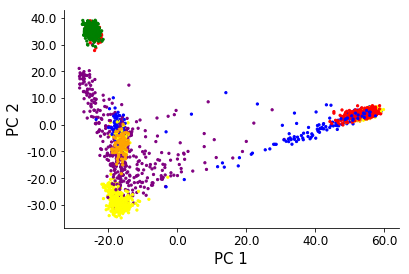

In [84]:
# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pc1, pc2, color=colors, s=5)
# Now make it look a little prettier since I can't stand matplotlib defaults...
ax.set_xlabel("PC 1", size=15)
ax.set_ylabel("PC 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();



In [85]:
fig.savefig('./PCA_small_dataset.png')